In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

In [2]:
sys.path.append("../scripts")

In [3]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
credit_df = pd.read_csv("../data/raw/creditcard.csv")
ip_df =pd.read_csv("../data/raw/IpAddress_to_Country.csv")

In [4]:
from proccesing import *
from eda import *
from ip_geolocation import *
from feature import *

In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
fraud_df = fraud_df.drop_duplicates()
columns_with_types = {
        'user_id': 'int64',
        'purchase_value': 'float64',
        'signup_time': 'datetime64[ns]',
        'purchase_time': 'datetime64[ns]',
        'age': 'int64',
        'ip_address': 'int64',
        'class': 'int64'
    }
fraud_df = fraud_df.astype(columns_with_types)

In [9]:
ip_df = ip_df.drop_duplicates()
columns_with_types = {
        'lower_bound_ip_address': 'int64',
        'upper_bound_ip_address': 'int64'
    }
ip_df = ip_df.astype(columns_with_types)

In [10]:
credit_df = credit_df.drop_duplicates()
columns_with_types = {
        'Time': 'float64',
        'Amount': 'float64',
        'Class': 'int64'
    }
credit_df = credit_df.astype(columns_with_types)

In [11]:
fraud_df = handle_missing_values(fraud_df)

Missing values before handling:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values after handling:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


c:\Users\Kalea\Desktop\week 8 & 9\fraud-detection-adey-innovations\notebooks\../scripts\proccesing.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
c:\Users\Kalea\Desktop\week 8 & 9\fraud-detection-adey-innovations\notebooks\../scripts\proccesing.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [12]:
credit_df = handle_missing_values(credit_df)

Missing values before handling:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing values after handling:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
#Removes duplicates and corrects data types
fraud_df = clean_data(fraud_df)
ip_df = clean_data(ip_df)
credit_df = clean_data(credit_df)

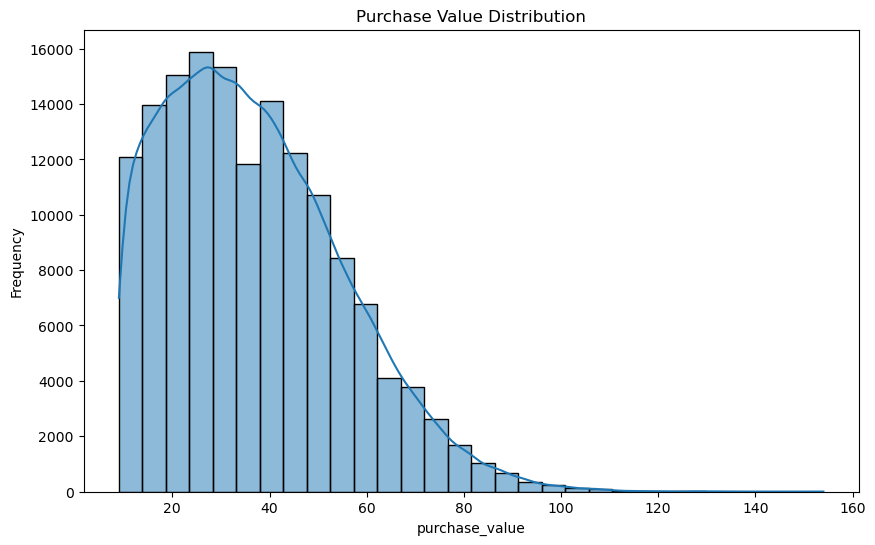

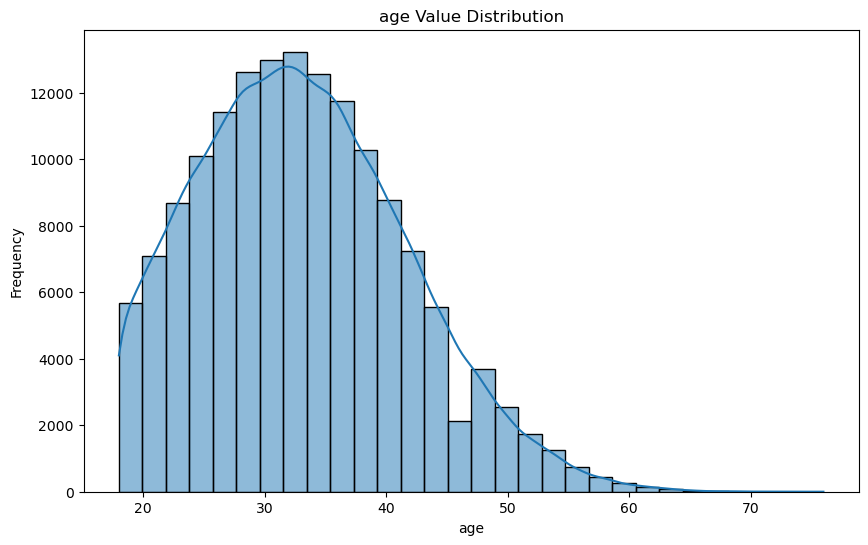

In [14]:
univariate_analysis(fraud_df, 'purchase_value', 'Purchase Value Distribution')
univariate_analysis(fraud_df, 'age', 'age Value Distribution')

C:\Users\Kalea\AppData\Local\Temp\ipykernel_18708\933173301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_df, x='class', palette=['lightblue', 'salmon'])


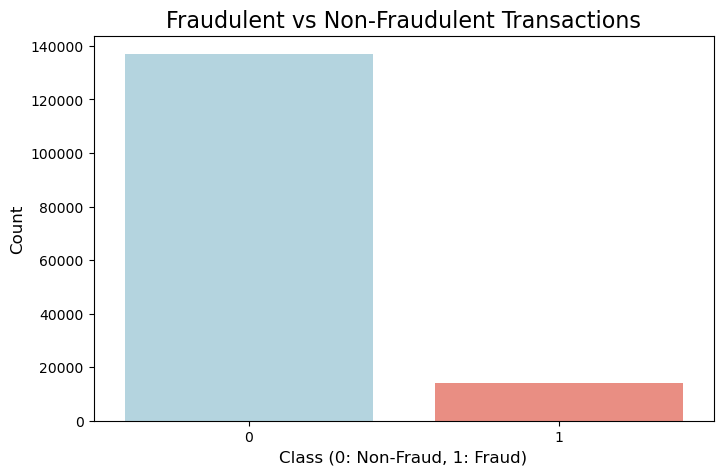

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=fraud_df, x='class', palette=['lightblue', 'salmon'])
plt.title('Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

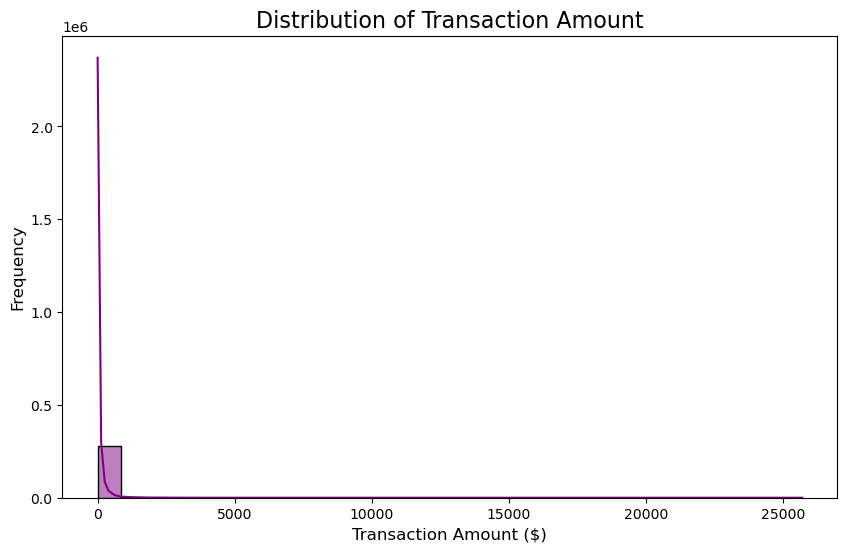

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['Amount'], kde=True, bins=30, color='purple')
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

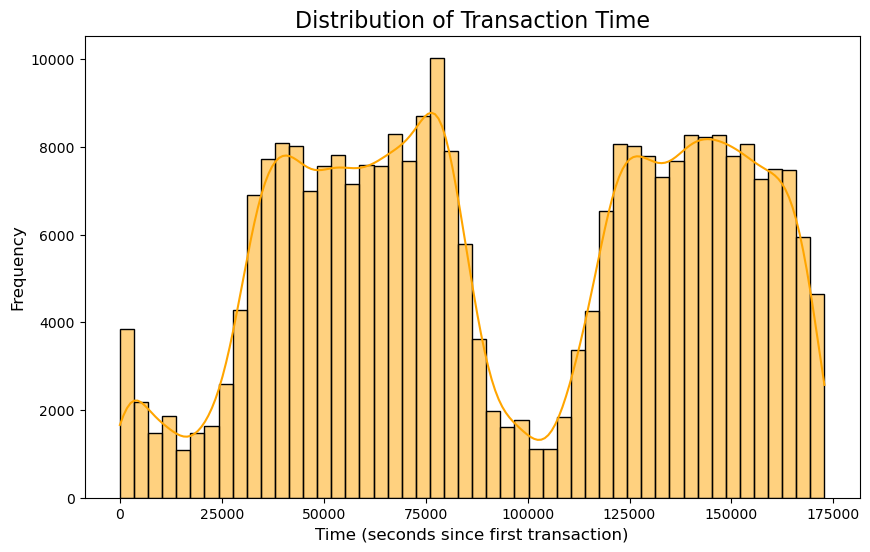

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['Time'], kde=True, bins=50, color='orange')
plt.title('Distribution of Transaction Time', fontsize=16)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_18708\3175622293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=credit_df, x='Class', palette=['lightblue', 'salmon'])


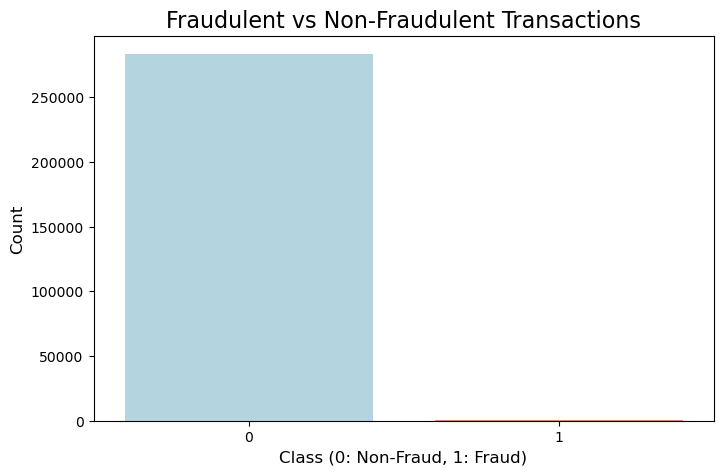

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=credit_df, x='Class', palette=['lightblue', 'salmon'])
plt.title('Fraudulent vs Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

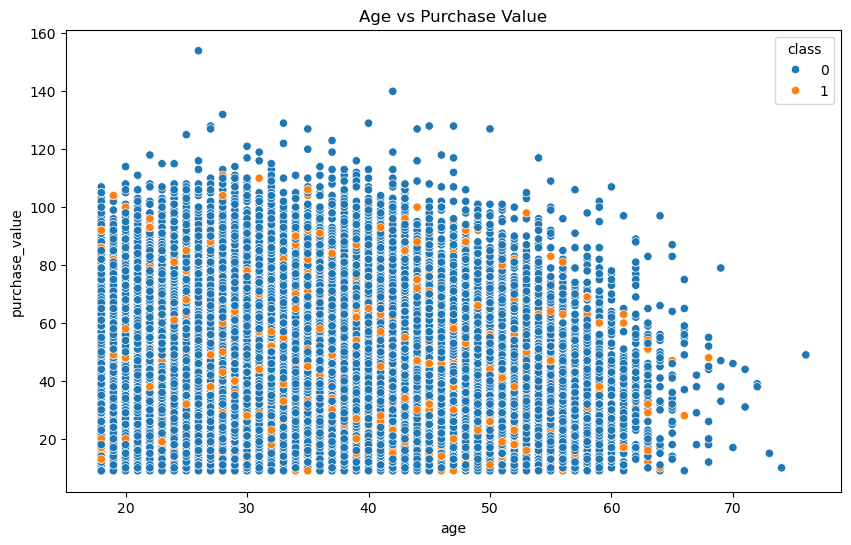

In [19]:
bivariate_analysis(fraud_df, 'age', 'purchase_value', 'Age vs Purchase Value')

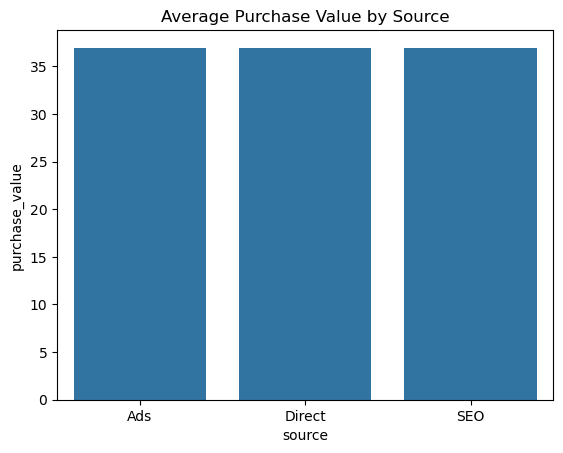

In [20]:
avg_purchase_by_source = fraud_df.groupby('source')['purchase_value'].mean().reset_index()
sns.barplot(data=avg_purchase_by_source, x='source', y='purchase_value')
plt.title('Average Purchase Value by Source')
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_18708\2349343873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_fraud, x='sex', y='class', palette=['lightblue', 'salmon'])


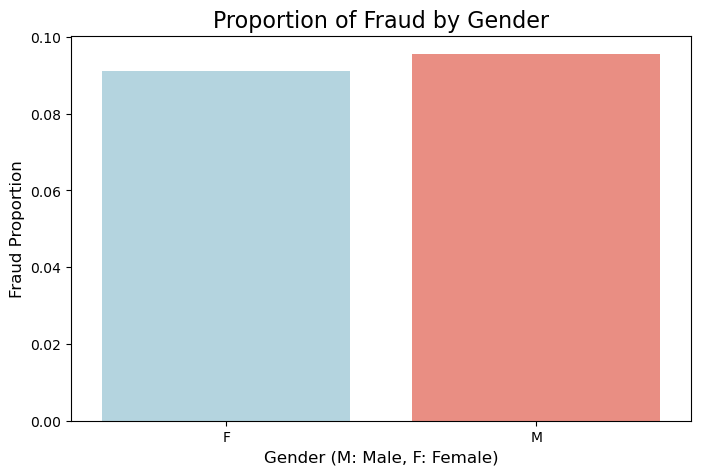

In [21]:
gender_fraud = fraud_df.groupby('sex')['class'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_fraud, x='sex', y='class', palette=['lightblue', 'salmon'])
plt.title('Proportion of Fraud by Gender', fontsize=16)
plt.xlabel('Gender (M: Male, F: Female)', fontsize=12)
plt.ylabel('Fraud Proportion', fontsize=12)
plt.show()

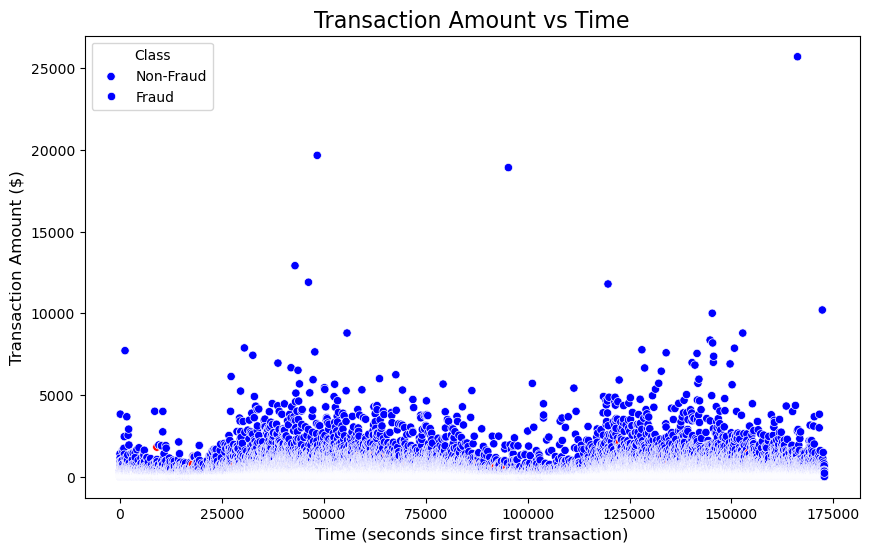

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credit_df, x='Time', y='Amount', hue='Class', palette=['blue', 'red'])
plt.title('Transaction Amount vs Time', fontsize=16)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()

C:\Users\Kalea\AppData\Local\Temp\ipykernel_18708\66760615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_amount, x='Class', y='Amount', palette=['lightblue', 'salmon'])


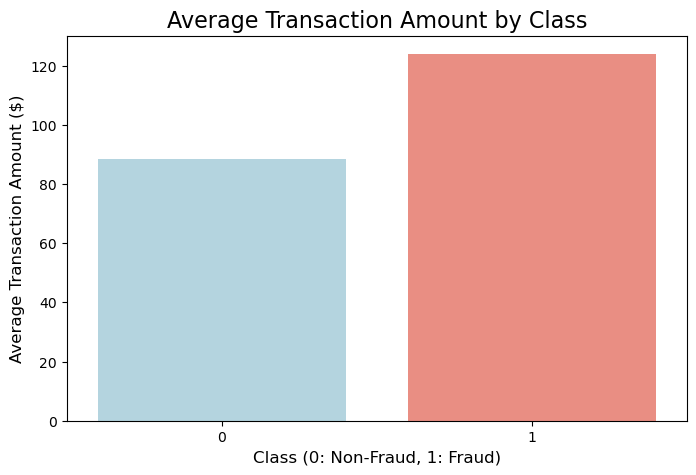

In [23]:
class_amount = credit_df.groupby('Class')['Amount'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=class_amount, x='Class', y='Amount', palette=['lightblue', 'salmon'])
plt.title('Average Transaction Amount by Class', fontsize=16)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Average Transaction Amount ($)', fontsize=12)
plt.show()

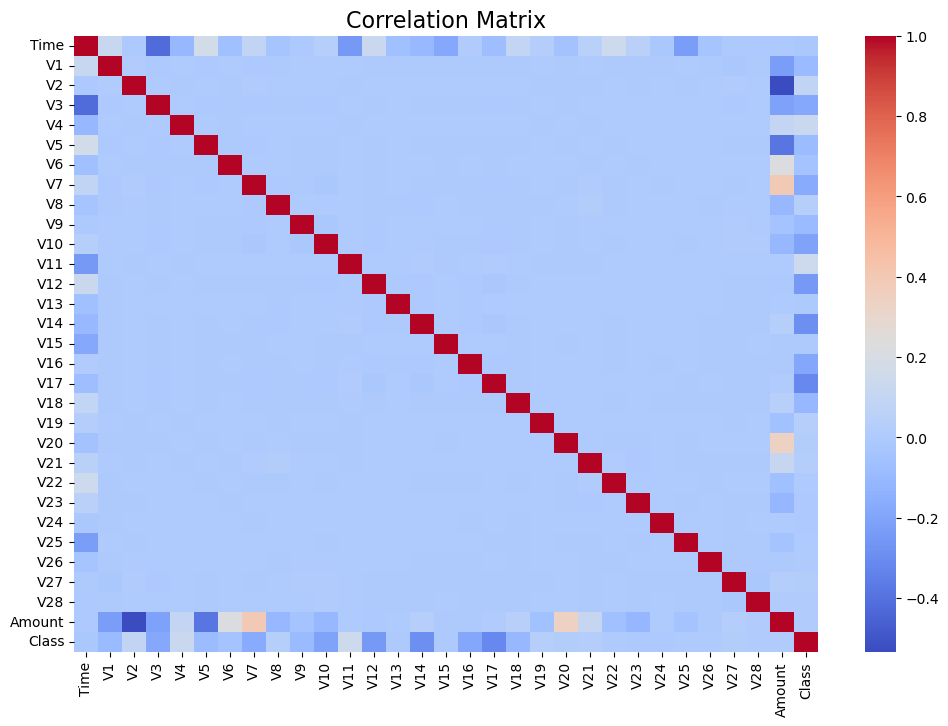

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = credit_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

### Merge Datasets for Geolocation Analysis

In [25]:
merged_data = merge(fraud_df, ip_df)

     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29            47.0   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28            15.0   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23            44.0   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14            55.0   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30            51.0   

         device_id  source browser sex  age  ip_address  class    country  
634  KIXYSVCHIPQBR     SEO  Safari   F   30    16778864      0  Australia  
635  PKYOWQKWGJNJI     SEO  Chrome   F   34    16842045      0   Thailand  
636  LVCSXLISZHVUO     Ads      IE   M   29    16843656      0      China  
637  UHAUHNXXUADJE  Direct  Chrome   F   30    16938732      0      China  
638  XPGPMOHIDRMGE     SEO  Chrome   F   37    16971984      0   Thailand  


In [26]:
print(merged_data[['user_id', 'ip_address', 'country']].head())

     user_id  ip_address    country
634   247547    16778864  Australia
635   220737    16842045   Thailand
636   390400    16843656      China
637    69592    16938732      China
638   174987    16971984   Thailand


In [30]:
file_path = "../data/merged_data.csv"
preprocessed = preprocess(file_path)

   Unnamed: 0  user_id         signup_time       purchase_time  \
0         634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29   
1         635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28   
2         636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23   
3         637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14   
4         638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30   

   purchase_value      device_id  source  browser  sex  age  ip_address  \
0        0.262069  KIXYSVCHIPQBR       2        4    0   30    16778864   
1        0.041379  PKYOWQKWGJNJI       2        0    0   34    16842045   
2        0.241379  LVCSXLISZHVUO       0        2    1   29    16843656   
3        0.317241  UHAUHNXXUADJE       1        0    0   30    16938732   
4        0.289655  XPGPMOHIDRMGE       2        0    0   37    16971984   

   class    country  time_diff  user_transaction_frequency  \
0      0  Australia   0.350330                         0.0   
1      0   Thailand   0.1187

In [33]:
preprocessed.to_csv("../data/preprocessed.csv")